# Customer Segmentation

### 데이터 전처리

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [170]:
marketing_df_org = pd.read_csv('C:/Users/pbyim/OneDrive/바탕 화면/시온/Data/marketing_campaign.csv', sep='\t')
marketing_df = marketing_df_org.copy()
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [172]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- 'Income' 피처에서 결측값 발견

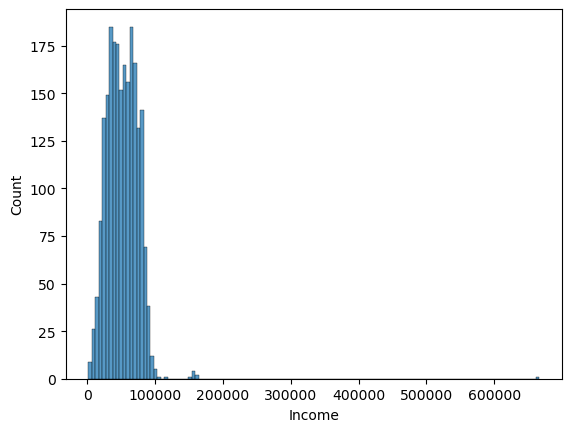

Missing value ratio:0.010830324909747292


In [175]:
sns.histplot(marketing_df['Income'])
plt.show()
null_val = marketing_df['Income'].isnull().sum()
print(f'Missing value ratio:{null_val/(2240-null_val)}')

- 'Income' 피처가 심하게 왜곡되어 있고 누락된 값이 1%에 불과하여 해당 행을 삭제.
- 또한 극단적으로 수입이 큰 데이터가 존재하여 이상치로 판단 및 삭제
- Recency가 이미 존재함으로 Dt_customer은 필요 없을 것으로 판단

In [178]:
marketing_df.dropna(subset=['Income'], inplace=True)
marketing_df.isnull().sum().sum()

0

In [180]:
marketing_df = marketing_df[marketing_df['Income'] < 600000]

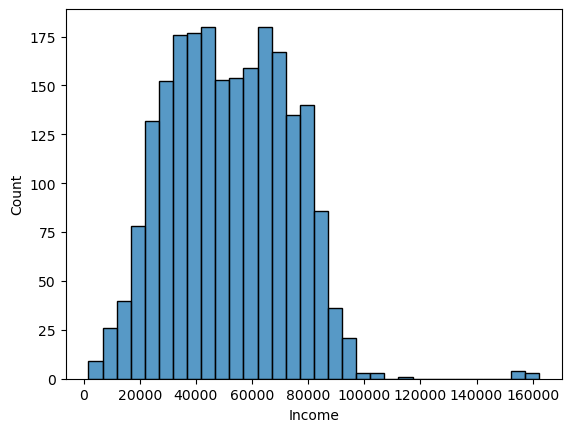

In [182]:
sns.histplot(marketing_df['Income'])
plt.show()

In [184]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   object 
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   int64 

- 기타 object 타입 피처 확인

In [187]:
print(marketing_df['ID'].value_counts())

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: count, Length: 2215, dtype: int64


In [189]:
print(marketing_df['Education'].value_counts())

Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [191]:
print(marketing_df['Marital_Status'].value_counts())

Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


- 지나치게 카테고리가 세분화 되어 있디
- Married는 Together과 병합하고 나머지는 Alone으로 처리하겠다

In [194]:
marketing_df['Live_with']=marketing_df['Marital_Status'].replace({'Married':'Together',  
                                                    'Absurd':'Alone', 
                                                    'Widow':'Alone', 
                                                    'YOLO':'Alone', 
                                                    'Divorced':'Alone', 
                                                    'Single':'Alone',})

- Kidhome과 Teenhome은 통합하여 총 자녀 수로 처리하겠다.
- Year birth는 Age로 바꿔 해석에 좀 더 직관적이게 변환한다
- 또한 Mnt...은 특정 재화 소비량으로 전체 통합한 '총 소비량'을 새로 만들고 ...Purchases도 묶어서 총 구매량을 만든다

In [197]:
marketing_df['Age'] = 2025 - marketing_df['Year_Birth']
marketing_df['Children'] = marketing_df['Kidhome'] + marketing_df['Teenhome']

In [199]:
marketing_df['Spending'] = marketing_df['MntFishProducts'] + marketing_df['MntFruits'] + \
marketing_df['MntGoldProds'] + marketing_df['MntMeatProducts'] + marketing_df['MntSweetProducts'] + marketing_df['MntWines']

In [201]:
marketing_df['Total_purchases'] = marketing_df['NumCatalogPurchases']+ marketing_df['NumDealsPurchases']+ marketing_df['NumStorePurchases']+ \
                            marketing_df['NumWebPurchases']+ marketing_df['NumWebVisitsMonth']

In [203]:
# 필요한 열만 추출
data = marketing_df.drop(['ID', 'Marital_Status', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome'], axis=1)

In [205]:
data.head(3)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Live_with,Age,Children,Spending,Total_purchases
0,Graduation,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,0,1,Alone,68,0,1617,32
1,Graduation,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,0,Alone,71,2,27,11
2,Graduation,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,0,Together,60,0,776,25


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2215 non-null   object 
 1   Income               2215 non-null   float64
 2   Recency              2215 non-null   int64  
 3   MntWines             2215 non-null   int64  
 4   MntFruits            2215 non-null   int64  
 5   MntMeatProducts      2215 non-null   int64  
 6   MntFishProducts      2215 non-null   int64  
 7   MntSweetProducts     2215 non-null   int64  
 8   MntGoldProds         2215 non-null   int64  
 9   NumDealsPurchases    2215 non-null   int64  
 10  NumWebPurchases      2215 non-null   int64  
 11  NumCatalogPurchases  2215 non-null   int64  
 12  NumStorePurchases    2215 non-null   int64  
 13  NumWebVisitsMonth    2215 non-null   int64  
 14  AcceptedCmp3         2215 non-null   int64  
 15  AcceptedCmp4         2215 non-null   int64 

In [209]:
data.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Spending,Total_purchases
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,51969.861400,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,2.322799,4.085779,...,0.074041,0.073138,0.064108,0.013544,0.009481,0.150339,56.183296,0.947178,607.321445,20.201354
std,21526.320095,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,1.923820,2.741473,...,0.261896,0.260421,0.245001,0.115614,0.096929,0.357484,11.987000,0.749230,602.925291,7.284520
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,5.000000,0.000000
25%,35284.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,69.000000,14.000000
50%,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,397.000000,19.000000
75%,68487.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1.000000,1048.000000,25.000000
max,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,132.000000,3.000000,2525.000000,46.000000


- Age의 최대값이 132로 되어 있다, 이상치로 판단하고 95세 이상의 데이터는 모두 삭제하겠다

In [212]:
data = data[data['Age'] < 95]
data.shape

(2212, 26)

In [214]:
# 원핫 인코딩 수행
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.shape

(2212, 29)

- 프로모션 응답 여부, 컴플레인과 같은 피처는 따로 추출
- 이는 추후 고객 군집화 수행 후 어떤 고객층이 프로모션 응답을 더 많이 하는지 등을 확인하기 위함

In [217]:
cols_to_drop = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Complain','Response']
modeling_data = data_encoded.drop(cols_to_drop, axis=1)

In [219]:
# 모델링을 수행할 데이터에 대해 스케일링 수행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(modeling_data)

In [221]:
data_scaled.shape

(2212, 22)

### 군집화 수행

In [224]:
from sklearn.decomposition import PCA

In [226]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)

data['pca_1'] = X_pca[:,0] ; data['pca_2'] = X_pca[:,1] ; data['pca_3'] = X_pca[:,2]

In [228]:
print(pca.explained_variance_ratio_)

[0.34062489 0.10431854 0.07865957]


- 차원 축소된 데이터를 시각화

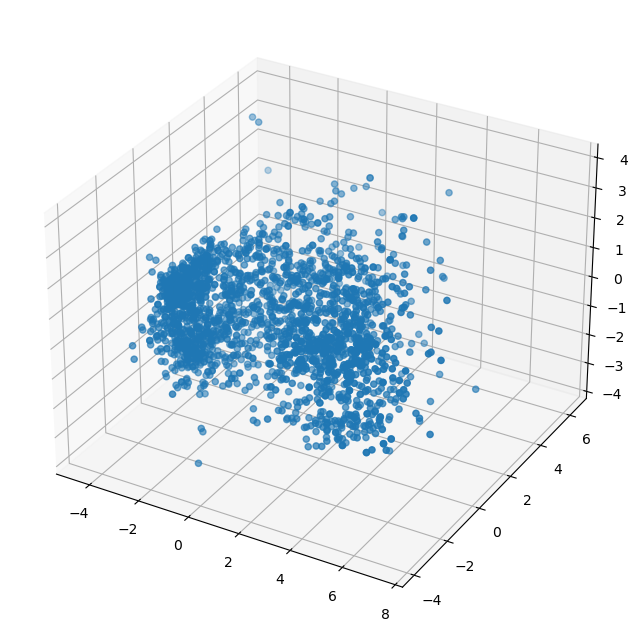

In [231]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data['pca_1'], data['pca_2'] ,data['pca_3'], marker="o" )
plt.show()

- 3차원 시각화를 위해 pca로 차원을 축소하였지만 이렇게 축소하는 경우 설명력이 너무 떨어짐.
- 또한, 21개의 피처는 결코 많다고 볼 수 없다고 판단하여 군집화를 수행할 때는 차원축소를 수행하지 않겠다.

In [234]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

In [243]:
kmeans = KMeans(n_clusters=4, random_state=123)
gmm = GaussianMixture(n_components=4, random_state=123)

kmeans_label = kmeans.fit_predict(data_scaled)
gmm_label = gmm.fit_predict(data_scaled)

data['kmeans_label'] = kmeans_label
data['gmm_label'] = gmm_label

- 실루엣 스코어를 통해 군집화가 잘 됐는지 수치화하여 확인해 본다

In [246]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [248]:
data['kmeans_coef'] = silhouette_samples(data_scaled, data['kmeans_label'])
data['gmm_coef'] = silhouette_samples(data_scaled, data['gmm_label'])

kmeans_avg_score = silhouette_score(data_scaled, data['kmeans_label'])
gmm_avg_score = silhouette_score(data_scaled, data['gmm_label'])

print(f'KMeans average silhouette score: {kmeans_avg_score}')
print(f'GMM average silhouette score: {gmm_avg_score}')
print('KMeans silhouetter score by cluster')
print(data.groupby('kmeans_label')['kmeans_coef'].mean())
print('GMM silhouette score by cluster')
print(data.groupby('gmm_label')['gmm_coef'].mean())

KMeans average silhouette score: 0.13146398470181733
GMM average silhouette score: 0.11894688668101874
KMeans silhouetter score by cluster
kmeans_label
0    0.136208
1    0.120488
2    0.260922
3    0.075146
Name: kmeans_coef, dtype: float64
GMM silhouette score by cluster
gmm_label
0    0.345388
1    0.023086
2    0.043124
3   -0.004728
Name: gmm_coef, dtype: float64


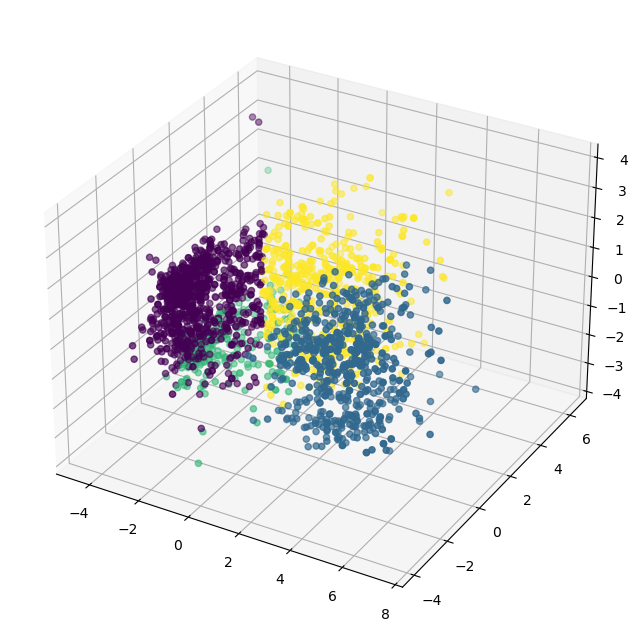

In [250]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data['pca_1'], data['pca_2'] ,data['pca_3'], c=data['kmeans_label'], marker="o" )
plt.show()

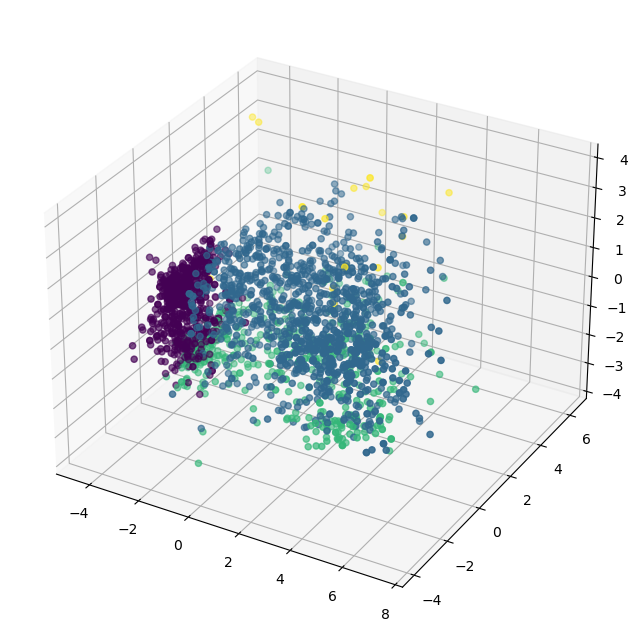

In [252]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data['pca_1'], data['pca_2'] ,data['pca_3'], c=data['gmm_label'], marker="o" )
plt.show()

- 두 방식 다 실루엣 계수가 높지는 않다
- 다만 KMeans가 조금 더 균일한 실루엣 계수를 갖고있어 KMeans를 채택하도록 하겠다

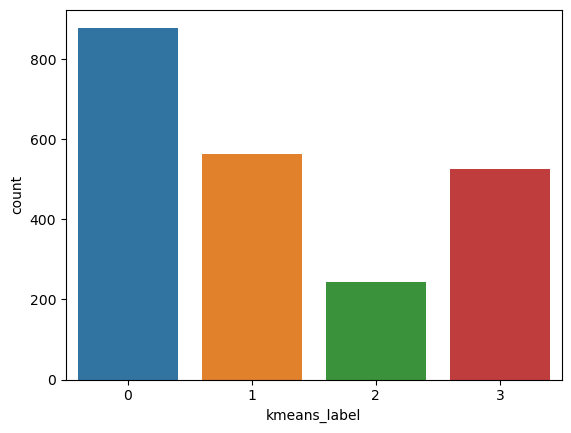

In [255]:
sns.countplot(x=data['kmeans_label'])
plt.show()

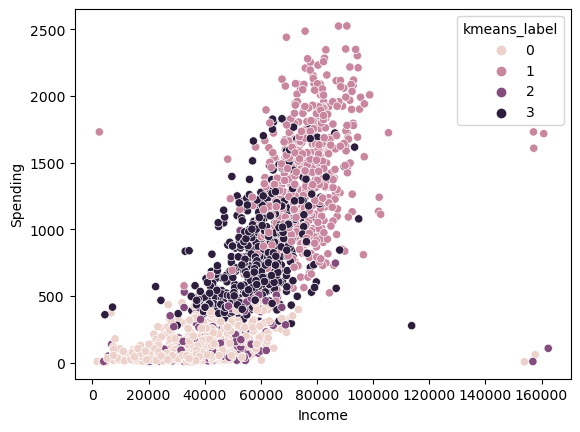

In [257]:
sns.scatterplot(x=data['Income'], y=data['Spending'], hue=data['kmeans_label'])
plt.show()

- 예외는 있지만 소득이 높을수록 소비가 증가하는 모습

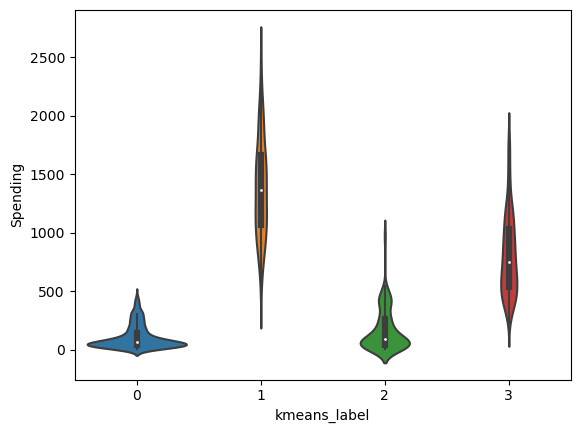

In [262]:
sns.violinplot(x=data['kmeans_label'], y=data['Spending'])
plt.show()

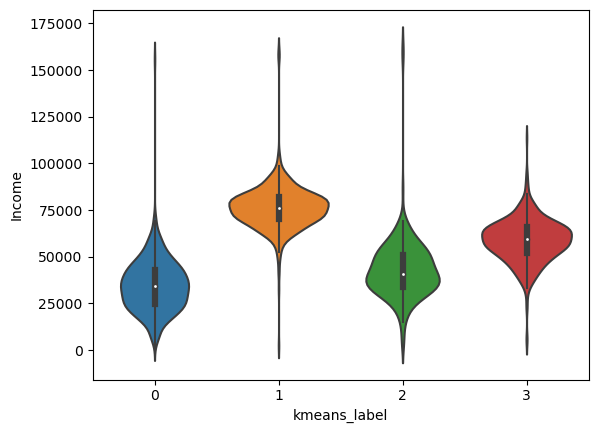

In [266]:
sns.violinplot(x=data['kmeans_label'], y=data['Income'])
plt.show()

- 수입이 평균적으로 가장 높은 **1번 군집**의 소비자들은 아주 넓은 소비량 분포를 갖고 있으나 전반적으로 그 값이 크다
- 0,2 번 군집은 수입이 거의 차이가 나지 않으나 2번 군집이 미세하게 높다. 소비량 또한 비슷하지만 2번 군집의 분산이 더 크다.
- 중간 정도의 수입을 가진 3번 군집은 그 소비량 또한 중간 정도로, 매우 큰 분산을 갖고 있다.

#### 결론적으로 전반적으로 소비수준과 수입은 양의 상관관계를 갖는다
- 다음으로 각 군집의 프로모션 응답률과 총 구매량을 시각화 해본다

In [277]:
data['Total_promotion'] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

In [287]:
data['kmeans_label'].value_counts()

kmeans_label
0    879
1    564
3    525
2    244
Name: count, dtype: int64

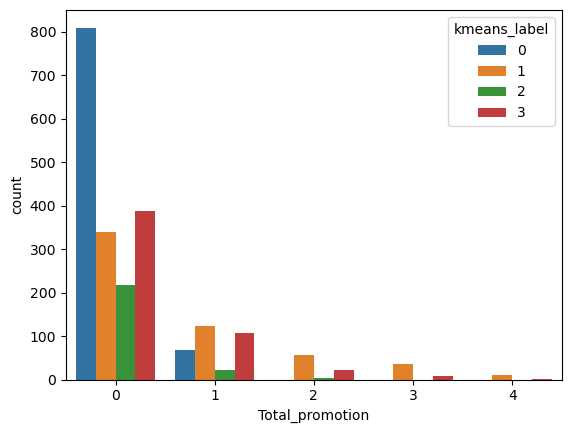

In [272]:
sns.countplot(x=data['Total_promotion'], hue=data['kmeans_label'])
plt.show()

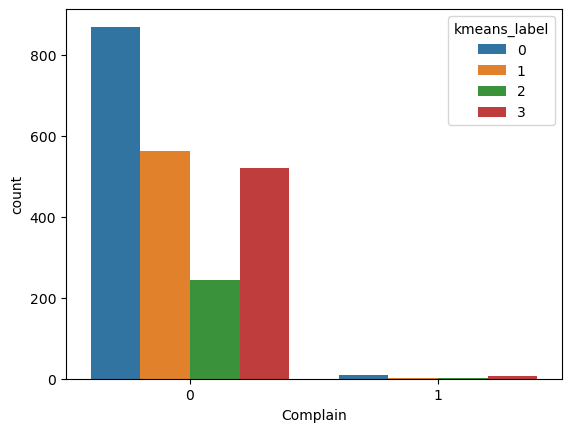

In [289]:
sns.countplot(x=data['Complain'], hue=data['kmeans_label'])
plt.show()

- 대부분의 소비자가 프로모션에 응답하지 않았으며
- 예상 외로 1,3번 군집 즉 소비수준이 상대적으로 높은 소비자들이 전반적으로 프로모션 응답 경험이 더 많은 것을 발견.
- 또한 대부분의 소비자는 컴플레인 이력이 없다.

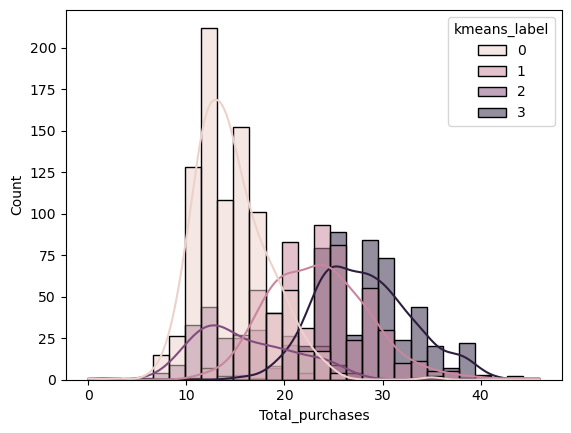

In [274]:
sns.histplot(x=data['Total_purchases'], kde=True, hue=data['kmeans_label'])
plt.show()

- 총 구매량을 보면 중간 소득층인 3번 군집의 소비자의 구매량이 가장 높다